## Exploratory analysis

### Importing useful libraries

In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from statsmodels.iolib.summary2 import summary_col
import seaborn as sn
pd.options.mode.chained_assignment = None  # default='warn'

### Importing data

In [26]:
raw_data = pd.read_csv(r'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [24]:
resale_data = pd.read_csv(r"resale-flat-prices-updated.csv")

### Examining the depedent variable in raw data

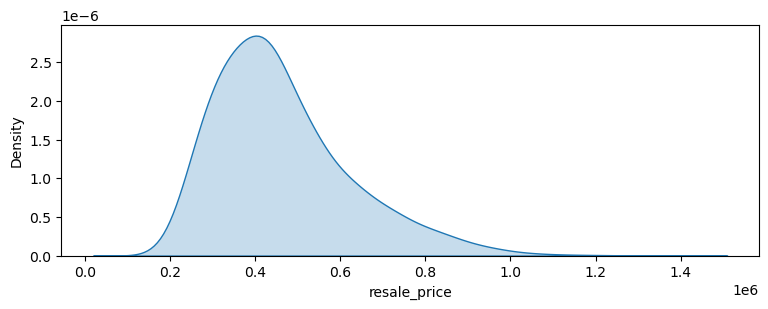

In [27]:
plt.figure(figsize = (9,3))
sn.kdeplot(raw_data['resale_price'], bw_method = 0.25 , fill = True)
plt.show()

In [28]:
sp.stats.skew(raw_data['resale_price'], axis = 0, bias = True)

1.0173162257523918

#### After logarithmic transformation

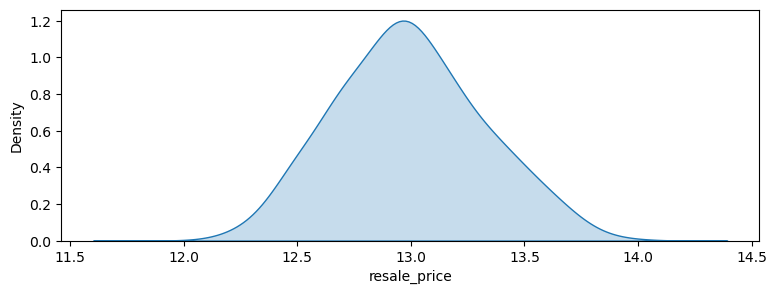

In [29]:
plt.figure(figsize = (9,3))
sn.kdeplot(np.log(raw_data['resale_price']), bw_method = 0.25 , fill = True)
plt.show()

In [30]:
sp.stats.skew(np.log(raw_data['resale_price']), axis = 0, bias = True)

0.16532113877972054

## Analysing updated data

In [37]:
resale_data['log_resale_price'] = np.log(resale_data['resale_price'])
df = resale_data[['log_resale_price', 'floor_area_sqm', 'proximity', 'average_level', 'remain_lease_m', 'n_hospitals', 'n_mrt']]
df.describe()

,log_resale_price,floor_area_sqm,proximity,average_level,remain_lease_m,n_hospitals,n_mrt
count,51638.000000,51638.000000,51638.000000,51638.000000,51638.000000,51638.000000,51638.000000
mean,13.003457,95.129426,2.415740,6.625160,942.348813,1.288799,3.140575
std,0.248454,7.135004,0.787154,3.343173,152.202563,1.243035,2.860462
min,12.292250,70.000000,0.000000,2.000000,534.000000,0.000000,0.000000
25%,12.829334,91.000000,2.000000,5.000000,803.000000,0.000000,1.000000
50%,12.971540,93.000000,3.000000,6.000000,945.000000,1.000000,3.000000
75%,13.128345,102.000000,3.000000,8.000000,1109.000000,2.000000,4.000000
max,14.014361,145.000000,3.000000,27.000000,1171.000000,7.000000,23.000000


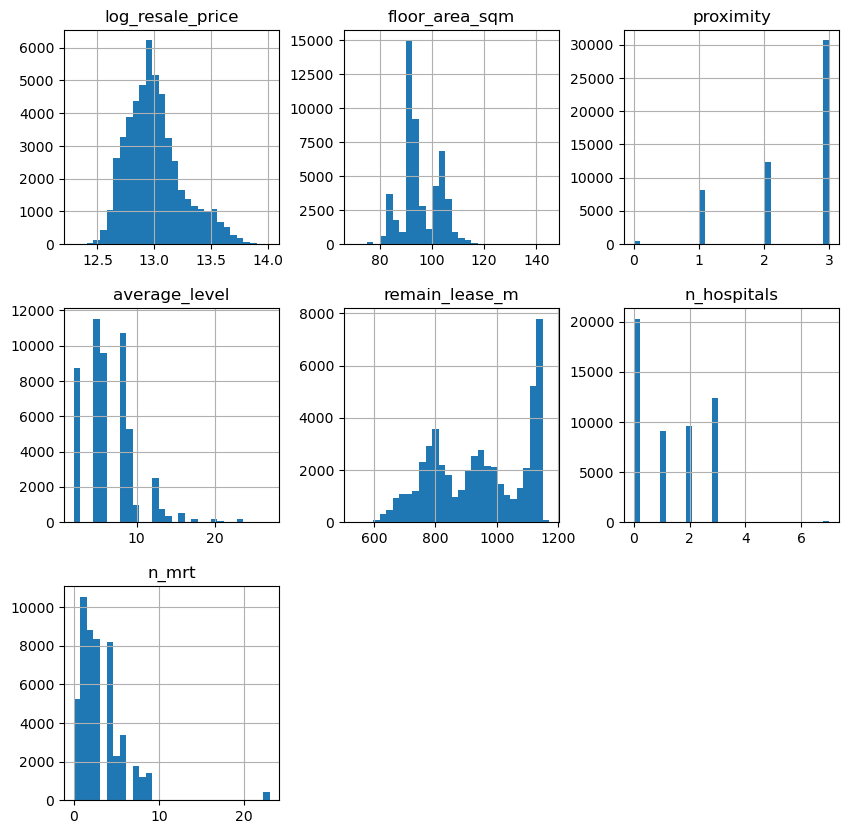

In [42]:
df.hist(bins=30, figsize=(10, 10))
plt.show()

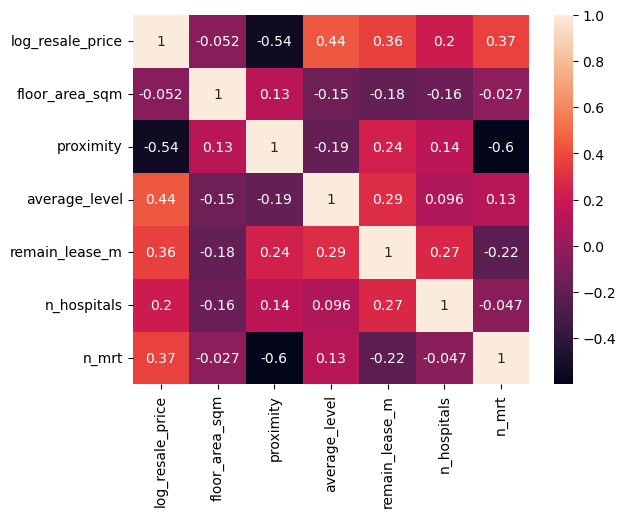

In [38]:
x = ['log_resale_price','floor_area_sqm','proximity', 'average_level', 'remain_lease_m', "n_hospitals", "n_mrt"]
corrMatrix = resale_data[x].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()